In [1]:
import sys
import os
sys.path.append(os.path.abspath('../src'))
from utils import load_image, get_image_histogram, display_image, display_histogram, load_all_images, flatten_images, display_scatter
from data_exploration import  apply_kmeans_clustering, reduce_dimensionality_for_clusterign, get_avgrage_width_and_lenght , get_image_intensity_statistics, print_intensity_statistics, get_sifit_image, get_harris_corners_image, get_orb_image, image_canny_edge_detection, gaussian_blure, thresholding

In [2]:
# Downloading dataset, renaming images and orginizing them into proper folders
# download_splited_minst_dataset()

In [3]:
# Setting up variables
root_directory = '../datasets/mnist_all/'
class_names = ['0', '1', '2', '3', '4', '6', '7', '8', '9']

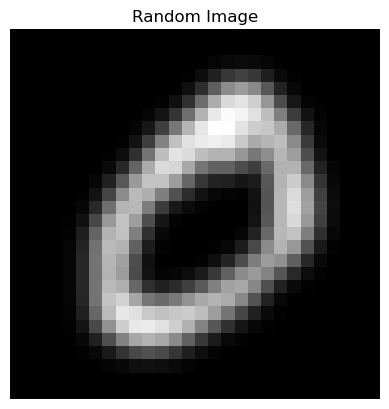

In [4]:
# Applying Gaussian blur to reduce noise
image = load_image(root_directory+'0/0_1.png')
blurred_image, blurred_image_float = gaussian_blure()



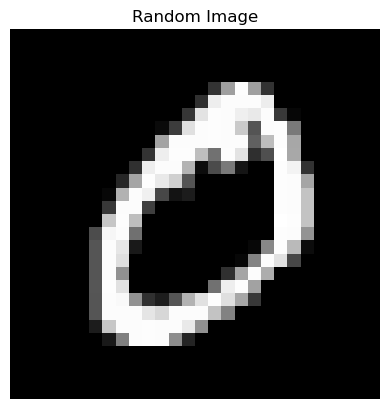

In [5]:
# Displaying an image
display_image(image, 'Random Image', 'x', 'y')

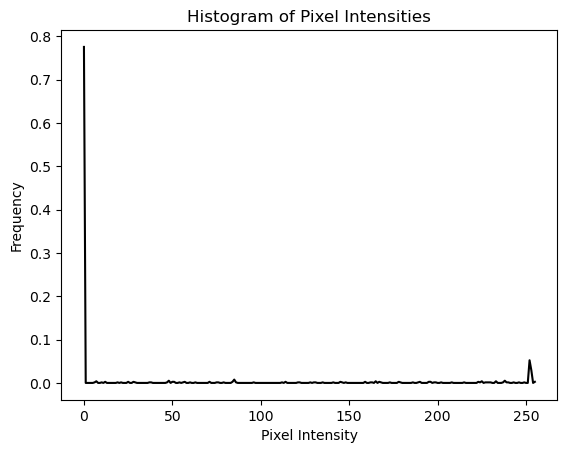

In [6]:
# Calculating the image intensity histogram
hist = get_image_histogram(image)

# Ploting the image intensity histogram
display_histogram(hist, 'Histogram of Pixel Intensities', 'black', 'Pixel Intensity', 'Frequency')

In [7]:
# Calculating intensity statistical measures
mean_intensity, std_intensity , median_intensity = get_image_intensity_statistics(image)

# Printing intensity measures
print_intensity_statistics(mean_intensity, std_intensity, median_intensity)

Mean Intensity: 39.661989795918366
Standard Deviation: 83.88715868331147
Median Intensity: 0.0


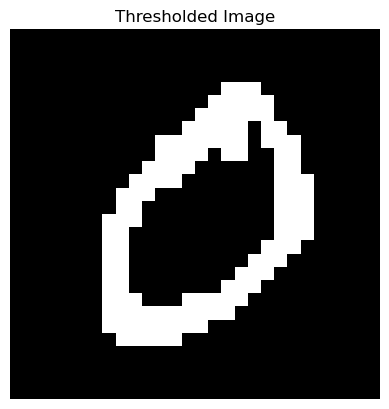

In [8]:
# Simpling thresholding
_, thresholded_image = thresholding(image)


# displaying thresholded image
display_image(thresholded_image, 'Thresholded Image', 'x', 'y')

In [9]:
# Calculating the avrage image dimensions
avreage_lenght, avrage_width = get_avgrage_width_and_lenght(root_directory, class_names)
print( str(int(avreage_lenght))+"  x  "+str(int(avrage_width)))

28  x  28


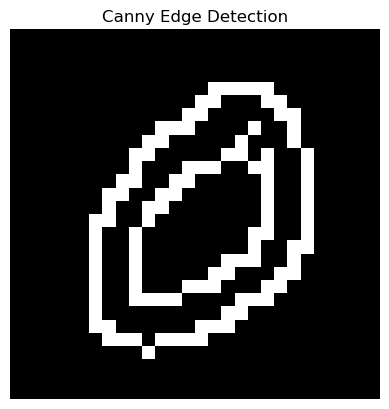

In [10]:
# Applying Canny edge detection
image_canny_edge_detection(blurred_image)

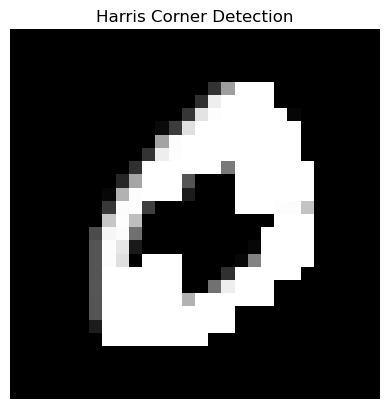

In [11]:
# Detect Harris corners
corner_image = get_harris_corners_image(blurred_image_float, image)

# Displaying the haris corners image
display_image(corner_image, 'Harris Corner Detection', 'x', 'y', cmap='gray')


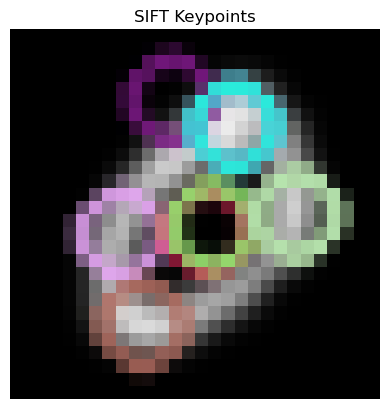

In [12]:
# Getting the sift image
sift_image = get_sifit_image(blurred_image)

# Displaying the sift image
display_image(sift_image, 'SIFT Keypoints', 'x', 'y', cmap='gray')


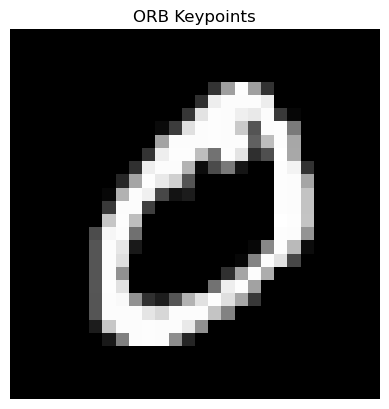

In [13]:
#  Getting the ORB image
orb_image = get_orb_image(blurred_image, image)
# orb = cv2.ORB_create()
# keypoints_orb, descriptors_orb = orb.detectAndCompute(blurred_image, None)
# orb_image = cv2.drawKeypoints(image, keypoints_orb, None)

# Displaying the ORB image
display_image(orb_image, 'ORB Keypoints','','')

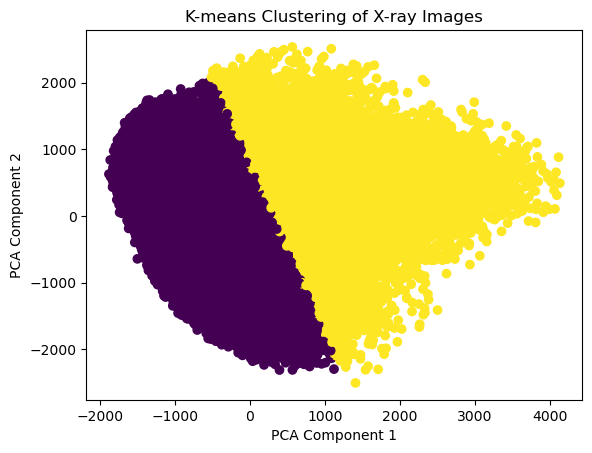

In [14]:
#Clustering and Dimensionality Reduction:

# Setting the variables fro clustering 
source_directory = '../datasets/mnist_all/'
destination_directory = '../datasets/clustered_results'
number_of_clusters = 2
number_of_components = 2

#Loading all the images
images = load_all_images(source_directory, class_names)

# Flatennign all the images
flattened_images = flatten_images(images)

# Reduce dimensionality using PCA for visualization
reduced_data = reduce_dimensionality_for_clusterign(flattened_images, number_of_components)


# Apply K-means clustering
labels = apply_kmeans_clustering(reduced_data, number_of_clusters)


# Plot the clustered data
display_scatter(reduced_data[:, 0], reduced_data[:, 1], labels,'K-means Clustering of X-ray Images', 'PCA Component 1', 'PCA Component 2')
